TODO:

- [ ] Update Planning TODO list
- [ ] Create script version

# Executive Summary

This notebook will attempt to answer the following research question:

    What's money got to do with it?

## PLANNING

- [X] Planning
    - [X] import libraries/packages
    - [X] configure notebook environment
    - [X] define helper functions
- [X] Acquire data
    - [X] get PEIMS financial data
    - [X] get STAAR performance data
    - [X] get ETHNICITY data
- [X] Use Dtale to analyze the dataset
         
*First, let's prepare the notebook environment*

In [1]:
# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(20,20))

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

<Figure size 2000x2000 with 0 Axes>

In [2]:
# get the ETHNICITY, PEIMS, and STAAR datasets
ethnic = pd.read_csv('../data/inter/clean_ethnic_2019.csv')
staar = pd.read_csv('../data/inter/clean_staar_2019.csv')
peims = pd.read_csv('../data/inter/clean_peims_2019.csv')

In [3]:
ethnic.head()
staar.head()
peims.head()

,District,Percentage of Non-White Students
0,1902,0.145315
1,1903,0.211415
2,1904,0.213158
3,1906,0.268657
4,1907,0.717973


,District,Total Number of Students,Total Number of Passing Students
0,1902,932,842
1,1903,1991,1651
2,1904,1365,1064
3,1906,569,420
4,1907,5497,3274


,DISTRICT,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES
0,1902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633
1,1903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465
2,1904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481
3,1906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786
4,1907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0


In [4]:
peims = peims.rename(columns={'DISTRICT':'District'})

In [5]:
# prep to do string operations onthe District columns
ethnic = ethnic.astype({"District": str})
staar = staar.astype({"District": str})
peims = peims.astype({"District": str})

In [6]:
# padd District numbers with 0's
ethnic['District'] = ethnic['District'].str.zfill(6)
staar['District'] = staar['District'].str.zfill(6)
peims['District'] = peims['District'].str.zfill(6)

In [7]:
ethnic.head()
staar.head()
peims.head()

,District,Percentage of Non-White Students
0,001902,0.145315
1,001903,0.211415
2,001904,0.213158
3,001906,0.268657
4,001907,0.717973


,District,Total Number of Students,Total Number of Passing Students
0,001902,932,842
1,001903,1991,1651
2,001904,1365,1064
3,001906,569,420
4,001907,5497,3274


,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0


In [8]:
# merge all the dataframes together on  District
df = pd.merge(peims, staar, on=['District'])
df = pd.merge(df, ethnic, on=['District'])

In [9]:
df.head()

,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   District                                               1250 non-null   object 
 1   TOTAL PAYROLL EXPENDITURES                             1250 non-null   int64  
 2   TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES  1250 non-null   int64  
 3   TOTAL SUPPLIES & MATERIALS EXPENDITURES                1250 non-null   int64  
 4   TOTAL OTHER OPERATING EXPENDITURES                     1250 non-null   int64  
 5   INSTRUCTION + TRANSFER EXPEND-FCT11,95                 1250 non-null   int64  
 6   INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12              1250 non-null   int64  
 7   CURRICULUM/STAFF DEVELOPMENT EXP, FCT13                1250 non-null   int64  
 8   INSTRUC LEADERSHIP EXPEND, FCT21                

In [11]:
df.shape

(1250, 36)

In [12]:
df = df.drop_duplicates('District')
df.shape

(1198, 36)

In [13]:
# create a new column based on total program operating expenditure per student
df['Total Expenditure Per Student'] = df['TOTAL PROGRAM OPERATING EXPENDITURES']/df['Total Number of Students']

In [14]:
df.head()

,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433


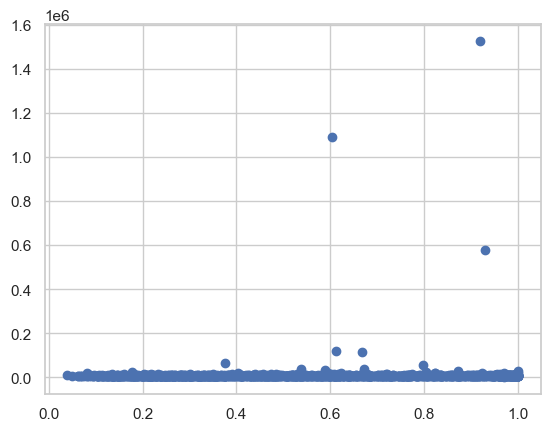

In [15]:
plt.scatter(df['Percentage of Non-White Students'], df['Total Expenditure Per Student'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ce70d3040>,
 'caps': [<matplotlib.lines.Line2D at 0x27ce70d3580>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ce70c1d30>],
 'medians': [<matplotlib.lines.Line2D at 0x27ce70d3ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ce70d3d60>],
 'means': []}

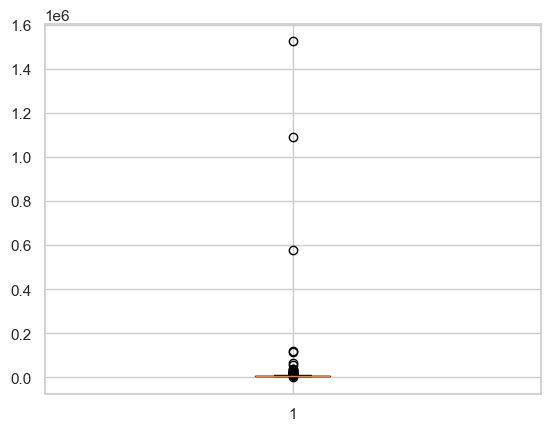

In [16]:
plt.boxplot(df['Total Expenditure Per Student'])

In [17]:
percentile25 = df['Total Expenditure Per Student'].quantile(0.25)
percentile75 = df['Total Expenditure Per Student'].quantile(0.75)

print("75th quartile: ", percentile75)
print("25th quartile: ", percentile25)

iqr = percentile75 - percentile25

upper_bound = percentile75 + 1.5 * iqr
lower_bound = percentile25 - 1.5 * iqr

df = df[df['Total Expenditure Per Student'] < upper_bound]
df = df[df['Total Expenditure Per Student'] > lower_bound]
df.shape

75th quartile:  7938.1571877065435
25th quartile:  5943.386321853544


(1123, 37)

array([[<Axes: title={'center': 'TOTAL PAYROLL EXPENDITURES'}>,
        <Axes: title={'center': 'TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES'}>,
        <Axes: title={'center': 'TOTAL SUPPLIES & MATERIALS EXPENDITURES'}>,
        <Axes: title={'center': 'TOTAL OTHER OPERATING EXPENDITURES'}>,
        <Axes: title={'center': 'INSTRUCTION + TRANSFER EXPEND-FCT11,95'}>,
        <Axes: title={'center': 'INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12'}>],
       [<Axes: title={'center': 'CURRICULUM/STAFF DEVELOPMENT EXP, FCT13'}>,
        <Axes: title={'center': 'INSTRUC LEADERSHIP EXPEND, FCT21'}>,
        <Axes: title={'center': 'CAMPUS ADMINISTRATION EXPEND, FCT23'}>,
        <Axes: title={'center': 'GUIDANCE & COUNSELING SERVICES EXP, FCT31'}>,
        <Axes: title={'center': 'SOCIAL WORK SERVICES EXP, FCT32'}>,
        <Axes: title={'center': 'HEALTH SERVICES EXP, FCT33'}>],
       [<Axes: title={'center': 'TRANSPORTATION EXPENDITURES, FCT34'}>,
        <Axes: title={'center': 'FO

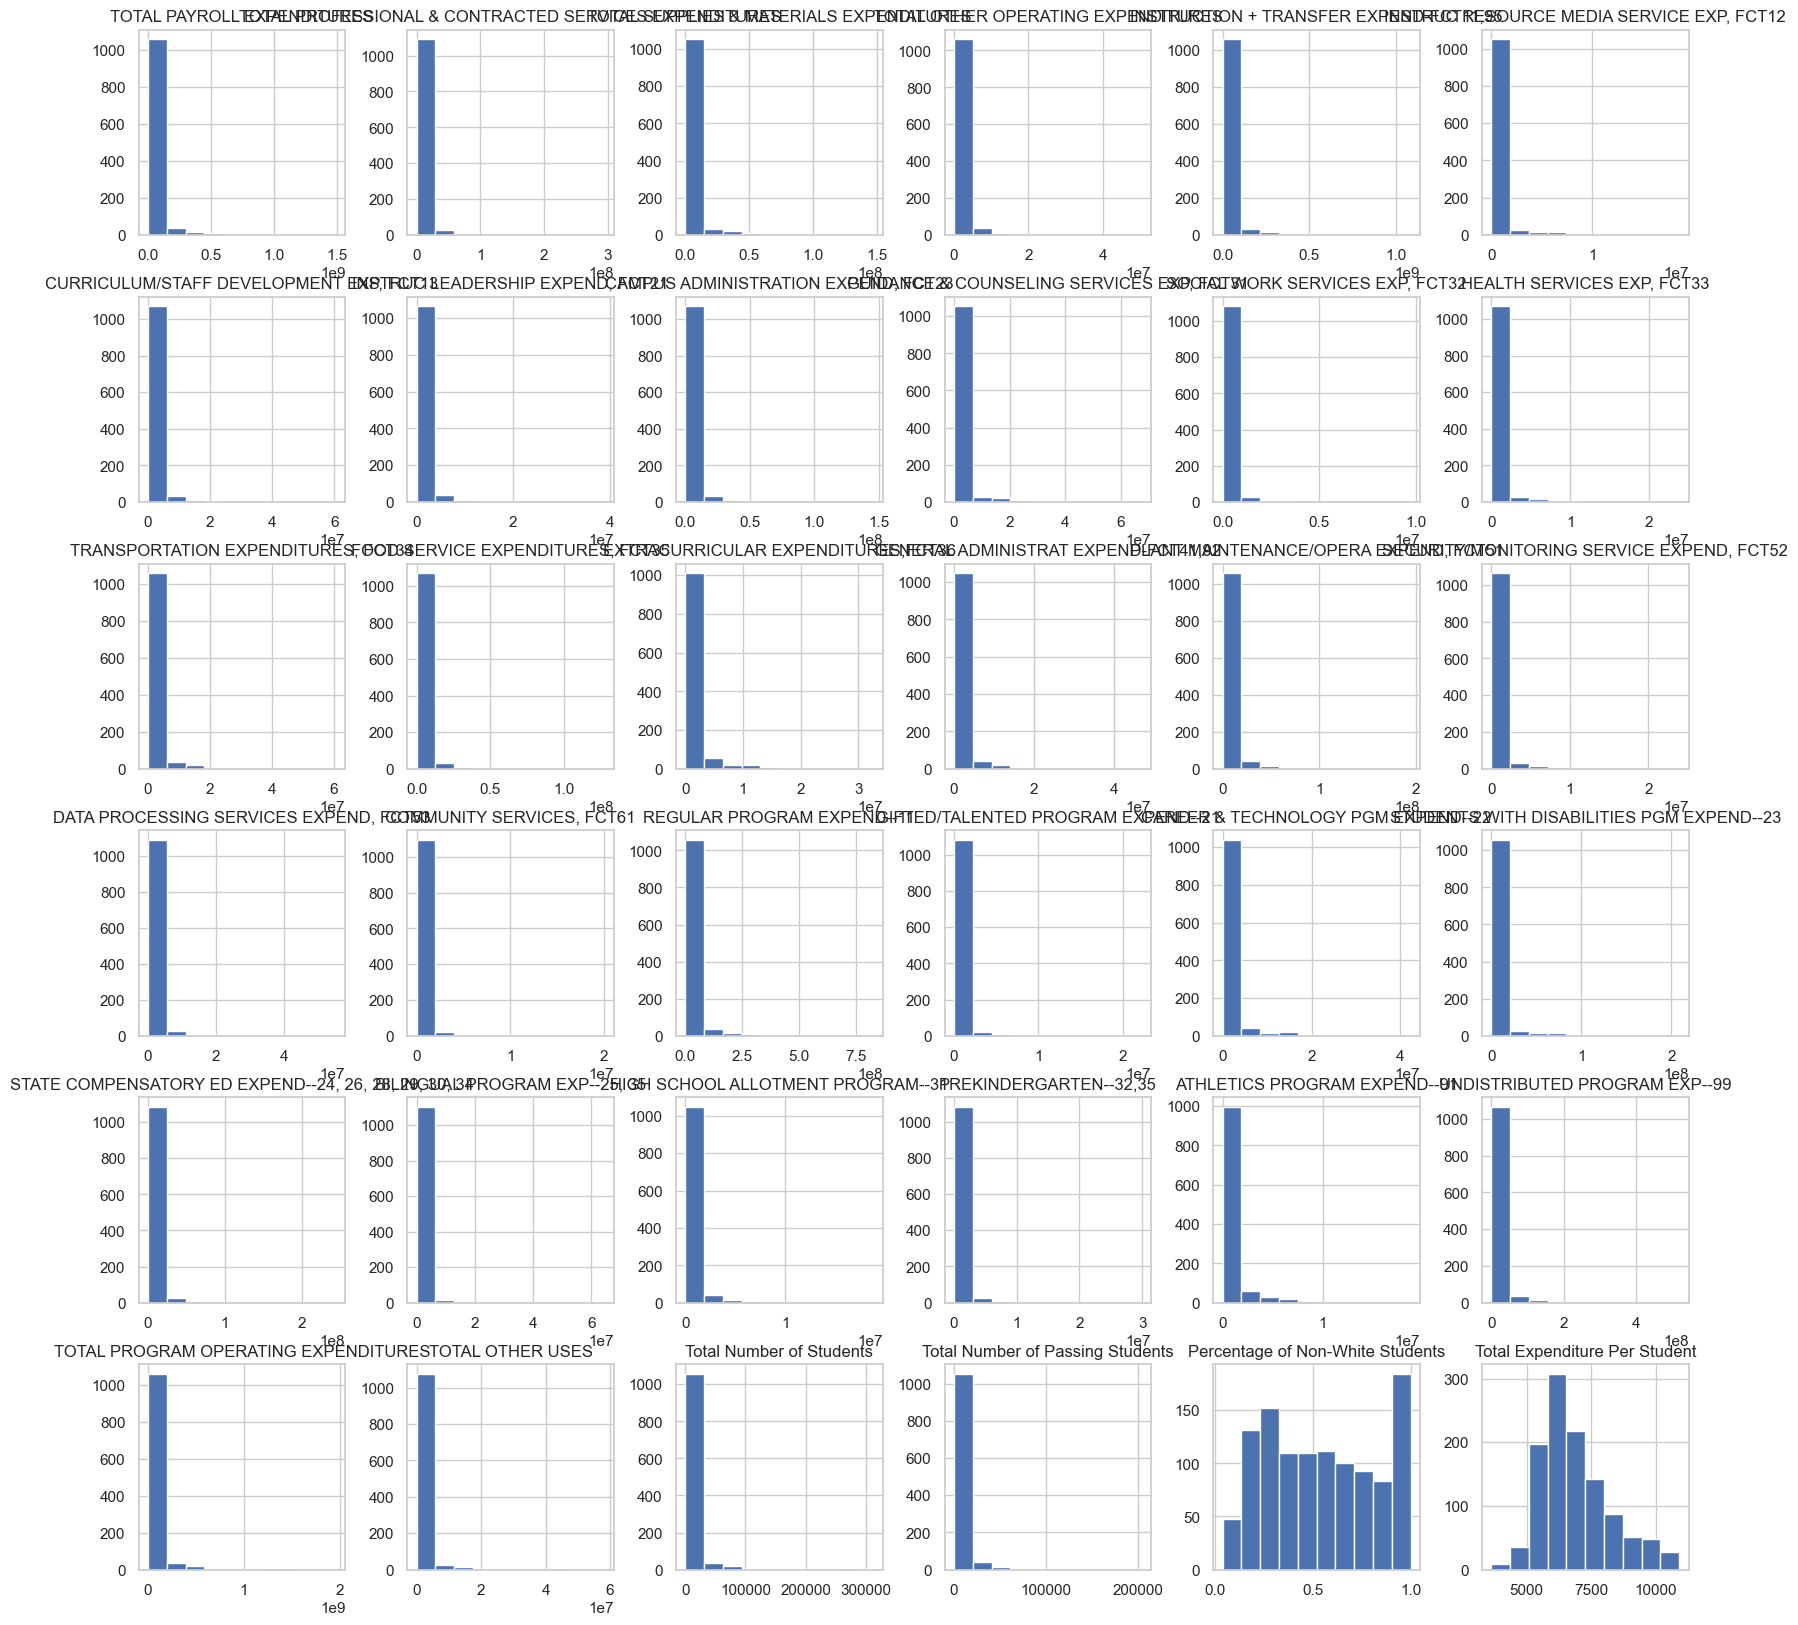

In [18]:
df.hist(figsize=(20,20))

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Percentage of Non-White Students')

Text(0, 0.5, 'Total Expenditure Per Student')

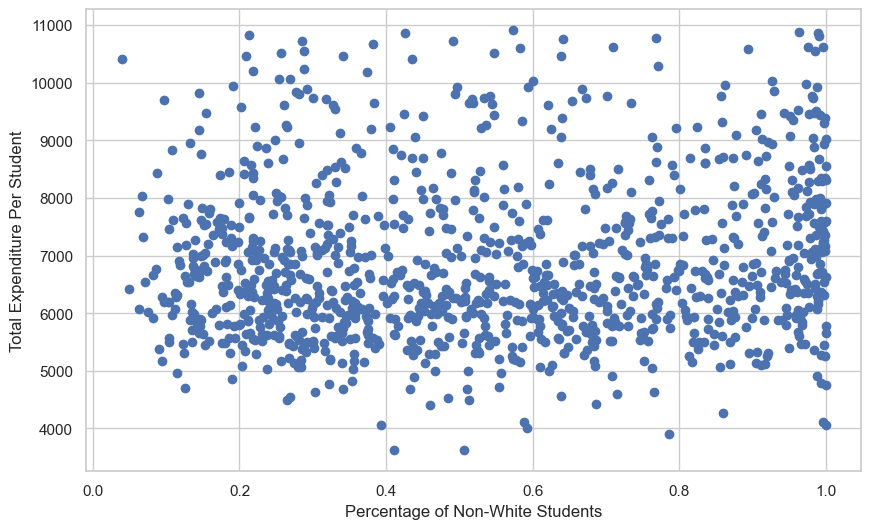

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df['Percentage of Non-White Students'], df['Total Expenditure Per Student'])
plt.xlabel('Percentage of Non-White Students')
plt.ylabel('Total Expenditure Per Student')

In [20]:
df.head()

,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433


In [21]:
df.describe()

,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student
count,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1123.000000,1123.000000,1123.000000,1123.000000
mean,3.766072e+07,4.438902e+06,4.127956e+06,1.264932e+06,2.663834e+07,5.370697e+05,1.085085e+06,7.786356e+05,2.812613e+06,1.791429e+06,1.359301e+05,4.943514e+05,1.450459e+06,2.586162e+06,1.460179e+06,1.528787e+06,4.616835e+06,4.964365e+05,8.448403e+05,2.353652e+05,2.103794e+07,3.705738e+05,1.480516e+06,5.832890e+06,4.132318e+06,6.130500e+05,5.096158e+05,5.091956e+05,9.684394e+05,1.203798e+07,4.749251e+07,9.314996e+05,7691.323241,5358.402493,0.546075,6880.611394
std,1.054610e+08,1.247683e+07,1.069091e+07,2.993751e+06,7.370248e+07,1.495642e+06,3.833688e+06,2.406881e+06,8.176398e+06,5.277575e+06,6.055103e+05,1.524033e+06,4.190985e+06,7.597724e+06,2.943904e+06,3.210577e+06,1.163130e+07,1.581895e+06,2.622720e+06,1.056895e+06,5.836517e+07,1.590105e+06,3.407862e+06,1.689474e+07,1.325387e+07,2.880348e+06,1.482842e+06,1.944450e+06,1.834878e+06,3.142946e+07,1.295473e+08,4.053269e+06,20892.030010,15783.794698,0.280358,1369.433052
min,1.911600e+05,6.316600e+04,3.131400e+04,5.373000e+03,4.564780e+05,0.000000e+00,0.000000e+00,-7.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.354400e+04,1.349800e+04,0.000000e+00,0.000000e+00,-6.500000e+02,5.493000e+04,0.000000e+00,0.000000e+00,1.782300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.123790e+05,-6.533000e+03,106.000000,31.000000,0.039216,3623.770069
25%,3.410406e+06,5.656915e+05,4.691175e+05,1.873920e+05,2.568536e+06,2.850950e+04,1.447150e+04,0.000000e+00,2.736230e+05,7.542750e+04,0.000000e+00,3.184200e+04,9.478850e+04,2.282650e+05,1.848580e+05,3.384815e+05,5.750870e+05,7.869000e+03,7.780350e+04,0.000000e+00,1.925447e+06,8.306000e+03,1.945760e+05,2.739095e+05,4.069235e+05,7.767000e+03,2.996550e+04,7.915000e+02,1.320775e+05,1.460598e+06,4.749616e+06,0.000000e+00,660.500000,395.500000,0.292488,5917.787457
50%,7.901258e+06,1.221476e+06,1.020417e+06,3.883620e+05,5.807932e+06,1.020280e+05,9.756400e+04,1.152440e+05,6.347930e+05,2.695080e+05,0.000000e+00,9.022000e+04,2.642290e+05,5.319740e+05,5.511330e+05,5.640200e+05,1.242282e+06,5.461000e+04,1.963580e+05,7.880000e+02,4.410307e+06,2.688800e+04,4.680080e+05,9.450870e+05,9.138070e+05,3.791300e+04,9.020300e+04,6.863600e+04,3.934460e+05,3.106

In [22]:
# creates a new column and designates a row as either diverse or not
df['Diverse'] = np.where(df['Percentage of Non-White Students']>=0.551026, 1, 0)

In [23]:
# creates a new column and designates a row as either effective or not
df['Effective'] = np.where(df['Total Expenditure Per Student']<6860.908489, 1, 0)

In [24]:
# create a new column based on total program operating expenditure per student
df['Passing Rate'] = df['Total Number of Passing Students']/df['Total Number of Students']

In [25]:
# creates a new column and designates a row as either passing or not
df['Passing'] = np.where(df['Passing Rate']>=0.75, 1, 0)

In [26]:
df.head()

,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student,Diverse,Effective,Passing Rate,Passing
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077,0,0,0.903433,1
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685,0,1,0.829232,1
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051,0,1,0.779487,1
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979,0,0,0.738137,0
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433,1,1,0.595598,0


In [27]:
def get_values(df, columns):
    """
    Take a dataframe and a list of columns and
    returns the value counts for the columns.
    """
    for column in columns:
        print(column)
        print('=====================================')
        print(df[column].value_counts(dropna=False))
        print('\n')

def show_values(df, param):
    if param == 'all':
        get_values(df, df.columns)
    else:
        get_values(df, param) 

show_values(df, ['Diverse', 'Effective', 'Passing'])

Diverse
Diverse
0    594
1    529
Name: count, dtype: int64


Effective
Effective
1    659
0    464
Name: count, dtype: int64


Passing
Passing
0    808
1    315
Name: count, dtype: int64




<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Expenditure Per Student')

Text(0, 0.5, 'Passing Rate')

Text(0.5, 1.0, 'All Districts')

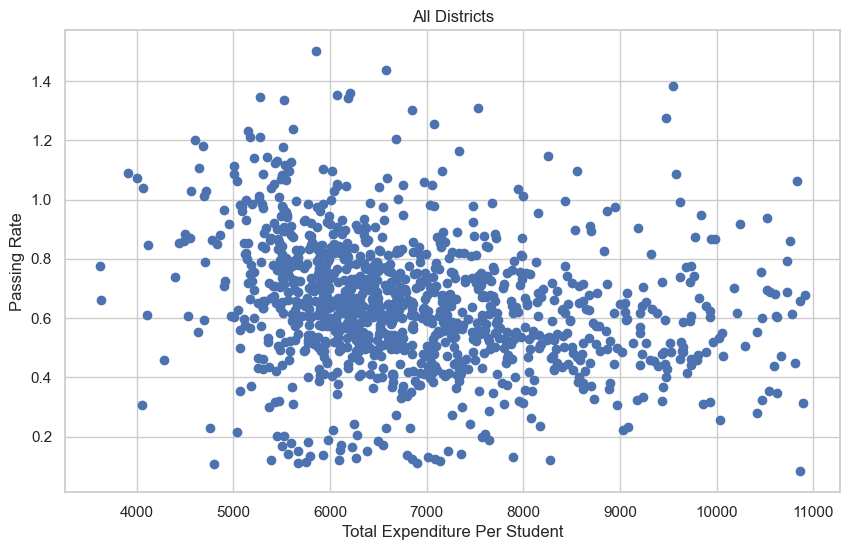

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['Total Expenditure Per Student'], df['Passing Rate'])
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('Passing Rate')
plt.title('All Districts')
plt.show()

In [29]:
df.describe()

,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student,Diverse,Effective,Passing Rate,Passing
count,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1.123000e+03,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,3.766072e+07,4.438902e+06,4.127956e+06,1.264932e+06,2.663834e+07,5.370697e+05,1.085085e+06,7.786356e+05,2.812613e+06,1.791429e+06,1.359301e+05,4.943514e+05,1.450459e+06,2.586162e+06,1.460179e+06,1.528787e+06,4.616835e+06,4.964365e+05,8.448403e+05,2.353652e+05,2.103794e+07,3.705738e+05,1.480516e+06,5.832890e+06,4.132318e+06,6.130500e+05,5.096158e+05,5.091956e+05,9.684394e+05,1.203798e+07,4.749251e+07,9.314996e+05,7691.323241,5358.402493,0.546075,6880.611394,0.471060,0.586821,0.647013,0.280499
std,1.054610e+08,1.247683e+07,1.069091e+07,2.993751e+06,7.370248e+07,1.495642e+06,3.833688e+06,2.406881e+06,8.176398e+06,5.277575e+06,6.055103e+05,1.524033e+06,4.190985e+06,7.597724e+06,2.943904e+06,3.210577e+06,1.163130e+07,1.581895e+06,2.622720e+06,1.056895e+06,5.836517e+07,1.590105e+06,3.407862e+06,1.689474e+07,1.325387e+07,2.880348e+06,1.482842e+06,1.944450e+06,1.834878e+06,3.142946e+07,1.295473e+08,4.053269e+06,20892.030010,15783.794698,0.280358,1369.433052,0.499384,0.492624,0.218054,0.449443
min,1.911600e+05,6.316600e+04,3.131400e+04,5.373000e+03,4.564780e+05,0.000000e+00,0.000000e+00,-7.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.354400e+04,1.349800e+04,0.000000e+00,0.000000e+00,-6.500000e+02,5.493000e+04,0.000000e+00,0.000000e+00,1.782300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.123790e+05,-6.533000e+03,106.000000,31.000000,0.039216,3623.770069,0.000000,0.000000,0.084187,0.000000
25%,3.410406e+06,5.656915e+05,4.691175e+05,1.873920e+05,2.568536e+06,2.850950e+04,1.447150e+04,0.000000e+00,2.736230e+05,7.542750e+04,0.000000e+00,3.184200e+04,9.478850e+04,2.282650e+05,1.848580e+05,3.384815e+05,5.750870e+05,7.869000e+03,7.780350e+04,0.000000e+00,1.925447e+06,8.306000e+03,1.945760e+05,2.739095e+05,4.069235e+05,7.767000e+03,2.996550e+04,7.915000e+02,1.320775e+05,1.460598e+06,4.749616e+06,0.000000e+00,660.500000,395.500000,0.292488,5917.787457,0.000000,0.000000,0.514772,0.000000
50%,7.901258e+06,1.221476e+06,1.020417e+06,3.883620e+05,5.807932e+06,1.020280e+05,9.756400e+04,1.152440e+05,6.347930e+05,2.695080e+05,0.000000e+00,9.022000

In [30]:
df =  df.loc[df['Passing Rate'] <= 1]
df.shape

(1056, 41)

In [31]:
df.head()

,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student,Diverse,Effective,Passing Rate,Passing
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077,0,0,0.903433,1
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685,0,1,0.829232,1
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051,0,1,0.779487,1
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979,0,0,0.738137,0
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433,1,1,0.595598,0


In [32]:
df.describe()

,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student,Diverse,Effective,Passing Rate,Passing
count,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1.056000e+03,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,3.607353e+07,4.320223e+06,4.013031e+06,1.214386e+06,2.544882e+07,5.128613e+05,1.044128e+06,7.714459e+05,2.720163e+06,1.711647e+06,1.378567e+05,4.773757e+05,1.400110e+06,2.548985e+06,1.383092e+06,1.485806e+06,4.459654e+06,4.851598e+05,8.103173e+05,2.237403e+05,1.995255e+07,3.209230e+05,1.440717e+06,5.509408e+06,4.214863e+06,6.037737e+05,4.600935e+05,5.189065e+05,9.278962e+05,1.167203e+07,4.562117e+07,8.843550e+05,7317.977273,4727.939394,0.552431,6931.431832,0.480114,0.573864,0.615880,0.234848
std,1.043127e+08,1.261075e+07,1.067754e+07,2.985518e+06,7.264213e+07,1.474548e+06,3.845691e+06,2.449963e+06,8.188230e+06,5.203577e+06,6.184388e+05,1.525947e+06,4.201254e+06,7.688930e+06,2.816274e+06,3.230861e+06,1.157499e+07,1.591316e+06,2.633592e+06,1.030925e+06,5.722025e+07,1.464596e+06,3.401369e+06,1.638230e+07,1.358251e+07,2.929601e+06,1.352951e+06,1.989058e+06,1.783831e+06,3.150416e+07,1.285144e+08,4.036703e+06,20562.696320,14483.632508,0.282159,1353.195117,0.499841,0.494748,0.182863,0.424105
min,4.464770e+05,6.316600e+04,3.131400e+04,5.373000e+03,4.564780e+05,0.000000e+00,0.000000e+00,-7.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.354400e+04,1.349800e+04,0.000000e+00,0.000000e+00,-6.500000e+02,5.493000e+04,0.000000e+00,0.000000e+00,1.782300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.123790e+05,-6.533000e+03,106.000000,31.000000,0.039216,3623.770069,0.000000,0.000000,0.084187,0.000000
25%,3.327397e+06,5.587520e+05,4.616008e+05,1.820998e+05,2.530581e+06,2.807200e+04,1.437825e+04,0.000000e+00,2.727062e+05,7.502800e+04,0.000000e+00,3.169675e+04,9.614975e+04,2.302662e+05,1.821848e+05,3.385785e+05,5.696290e+05,7.863750e+03,7.690350e+04,0.000000e+00,1.854511e+06,8.311500e+03,2.014142e+05,2.743528e+05,4.155032e+05,7.852500e+03,2.951525e+04,1.767750e+03,1.320848e+05,1.445761e+06,4.674538e+06,0.000000e+00,638.750000,378.750000,0.294096,5951.249615,0.000000,0.000000,0.503534,0.000000
50%,7.779009e+06,1.204012e+06,1.008480e+06,3.829555e+05,5.689414e+06,1.013730e+05,9.492600e+04,1.135520e+05,6.243030e+05,2.639025e+05,0.000000e+00,8.841550

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Expenditure Per Student')

Text(0, 0.5, 'Passing Rate')

Text(0.5, 1.0, 'All Districts')

Text(3500, 0.95, 'A')

Text(10500, 0.95, 'B')

Text(3500, 0.1, 'D')

Text(10500, 0.1, 'C')

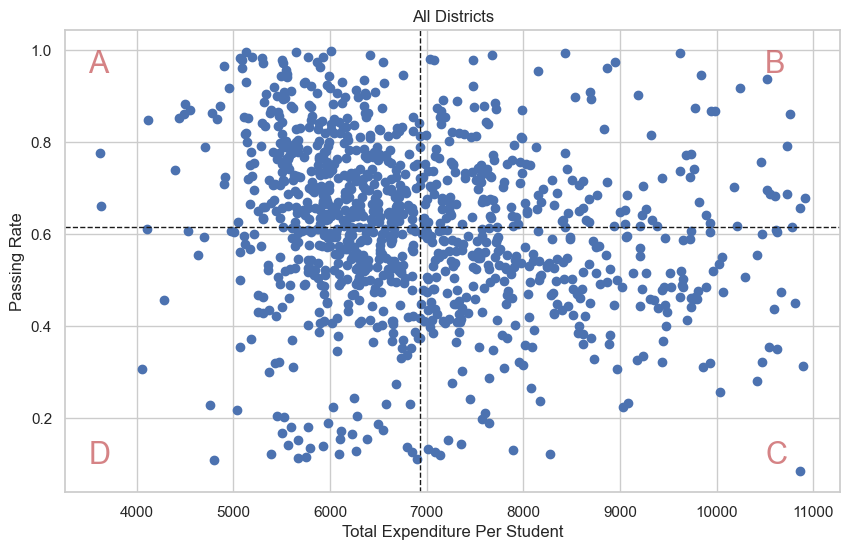

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(df['Total Expenditure Per Student'], df['Passing Rate'])
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('Passing Rate')
plt.title('All Districts')

# quadrant markers          
plt.text(x=3500, y=0.95, s="A",alpha=0.7,fontsize=22, color='r')
plt.text(x=10500, y=0.95, s="B",alpha=0.7,fontsize=22, color='r')
plt.text(x=3500, y=0.10, s="D", alpha=0.7,fontsize=22, color='r')
plt.text(x=10500, y=0.10, s="C", alpha=0.7,fontsize=22, color='r')   

# benchmark mean values          
plt.axhline(y=df['Passing Rate'].mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=df['Total Expenditure Per Student'].mean(), color='k',linestyle='--', linewidth=1) 

plt.show()

In [34]:
# define conditions
conditions = [
    (df['Total Expenditure Per Student'] < df['Total Expenditure Per Student'].mean()) & (df['Passing Rate'] >= df['Passing Rate'].mean()),
    (df['Total Expenditure Per Student'] >= df['Total Expenditure Per Student'].mean()) & (df['Passing Rate'] >= df['Passing Rate'].mean()),
    (df['Total Expenditure Per Student'] >= df['Total Expenditure Per Student'].mean()) & (df['Passing Rate'] < df['Passing Rate'].mean()),
    (df['Total Expenditure Per Student'] < df['Total Expenditure Per Student'].mean()) & (df['Passing Rate'] < df['Passing Rate'].mean())
]

# define results
results = ['A - Low Cost & High Performing', 'B - High Cost & High Performing', 'C - High Cost & Low Performing', 'D - Low Cost & Low Performing']

# create new column based on conditions in column1 and column2
df['Quadrant'] = np.select(conditions, results)

In [35]:
df.head()

,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student,Diverse,Effective,Passing Rate,Passing,Quadrant
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077,0,0,0.903433,1,B - High Cost & High Performing
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685,0,1,0.829232,1,A - Low Cost & High Performing
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051,0,1,0.779487,1,A - Low Cost & High Performing
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,420,0.268657,7068.347979,0,0,0.738137,0,B - High Cost & High Performing
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,3274,0.717973,6617.126433,1,1,0.595598,0,D - Low Cost & Low Performing


In [36]:
dfa =  df.loc[df['Quadrant'] == 'A - Low Cost & High Performing']
dfb =  df.loc[df['Quadrant'] == 'B - High Cost & High Performing']
dfc =  df.loc[df['Quadrant'] == 'C - High Cost & Low Performing']
dfd =  df.loc[df['Quadrant'] == 'D - Low Cost & Low Performing']

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Expenditure Per Student')

Text(0, 0.5, 'Passing Rate')

Text(0.5, 1.0, 'All Districts')

Text(3500, 0.95, 'A')

Text(10500, 0.95, 'B')

Text(3500, 0.1, 'D')

Text(10500, 0.1, 'C')

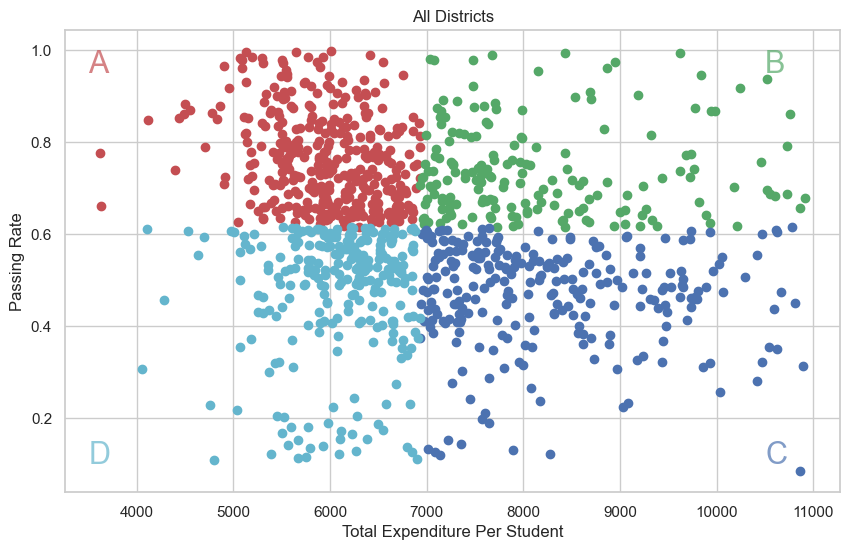

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(dfa['Total Expenditure Per Student'], dfa['Passing Rate'], c='r')
plt.scatter(dfb['Total Expenditure Per Student'], dfb['Passing Rate'], c='g')
plt.scatter(dfc['Total Expenditure Per Student'], dfc['Passing Rate'], c='b')
plt.scatter(dfd['Total Expenditure Per Student'], dfd['Passing Rate'], c='c')
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('Passing Rate')
plt.title('All Districts')

# quadrant markers         
plt.text(x=3500, y=0.95, s="A",alpha=0.7,fontsize=22, color='r')
plt.text(x=10500, y=0.95, s="B",alpha=0.7,fontsize=22, color='g')
plt.text(x=3500, y=0.10, s="D", alpha=0.7,fontsize=22, color='c')
plt.text(x=10500, y=0.10, s="C", alpha=0.7,fontsize=22, color='b')   

plt.show()

In [38]:
# splitting passing versus not-passing
df_passing =  df.loc[df['Passing'] == 1]
df_failing =  df.loc[df['Passing'] == 0]

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Expenditure Per Student')

Text(0, 0.5, 'Percentage of Non-White Students')

Text(0.5, 1.0, 'Passing Districts')

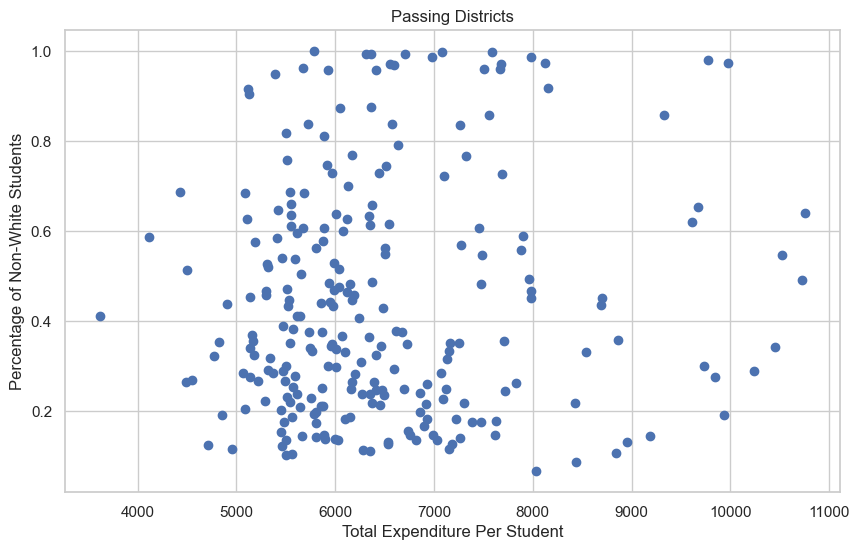

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df_passing['Total Expenditure Per Student'], df_passing['Percentage of Non-White Students'])
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('Percentage of Non-White Students')
plt.title('Passing Districts')  

plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Total Expenditure Per Student')

Text(0, 0.5, 'Percentage of Non-White Students')

Text(0.5, 1.0, 'Failing Districts')

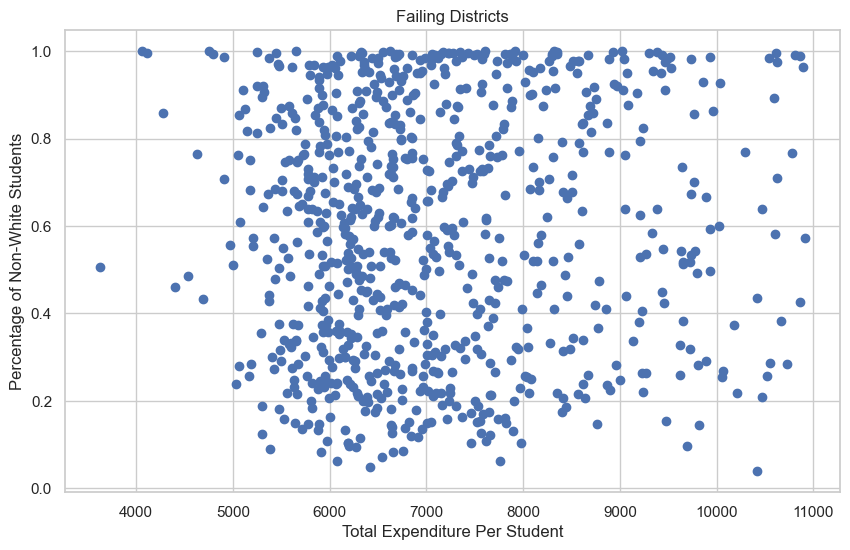

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(df_failing['Total Expenditure Per Student'], df_failing['Percentage of Non-White Students'])
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('Percentage of Non-White Students')
plt.title('Failing Districts')

plt.show()

<Figure size 1200x600 with 0 Axes>

C:\Users\Dd\OneDrive\Documents\_github\texas-public-schools-effectiveness\v399\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dd\OneDrive\Documents\_github\texas-public-schools-effectiveness\v399\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dd\OneDrive\Documents\_github\texas-public-schools-effectiveness\v399\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, 'B - High Cost & High Performing'),
 Text(1, 0, 'A - Low Cost & High Performing'),
 Text(2, 0, 'D - Low Cost & Low Performing'),
 Text(3, 0, 'C - High Cost & Low Performing')]

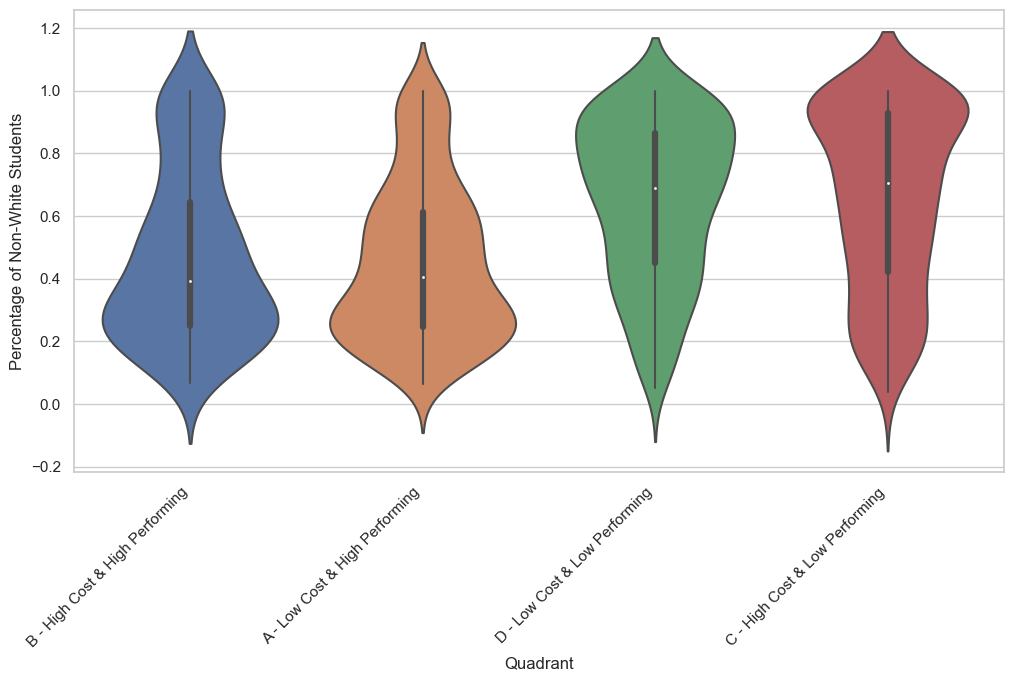

In [41]:
plt.figure(figsize=(12,6))
ax = sns.violinplot(x="Quadrant", y="Percentage of Non-White Students", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [43]:
df.head(3)

,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Total Number of Passing Students,Percentage of Non-White Students,Total Expenditure Per Student,Diverse,Effective,Passing Rate,Passing,Quadrant
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,842,0.145315,9183.354077,0,0,0.903433,1,B - High Cost & High Performing
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,1651,0.211415,5874.596685,0,1,0.829232,1,A - Low Cost & High Performing
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,1064,0.213158,6448.882051,0,1,0.779487,1,A - Low Cost & High Performing


In [44]:
df1 = df.drop(columns=['Total Number of Passing Students',
                       'Total Expenditure Per Student',
                       'Diverse',
                       'Effective',
                       'Passing',
                       'Quadrant'
                      ])

In [46]:
df1.head()

,District,TOTAL PAYROLL EXPENDITURES,TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,TOTAL SUPPLIES & MATERIALS EXPENDITURES,TOTAL OTHER OPERATING EXPENDITURES,"INSTRUCTION + TRANSFER EXPEND-FCT11,95","INSTRUC RESOURCE MEDIA SERVICE EXP, FCT12","CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","INSTRUC LEADERSHIP EXPEND, FCT21","CAMPUS ADMINISTRATION EXPEND, FCT23","GUIDANCE & COUNSELING SERVICES EXP, FCT31","SOCIAL WORK SERVICES EXP, FCT32","HEALTH SERVICES EXP, FCT33","TRANSPORTATION EXPENDITURES, FCT34","FOOD SERVICE EXPENDITURES, FCT35","EXTRACURRICULAR EXPENDITURES,FCT36","GENERAL ADMINISTRAT EXPEND-FCT41,92","PLANT MAINTENANCE/OPERA EXPEND, FCT51","SECURITY/MONITORING SERVICE EXPEND, FCT52","DATA PROCESSING SERVICES EXPEND, FCT53","COMMUNITY SERVICES, FCT61",REGULAR PROGRAM EXPEND--11,GIFTED/TALENTED PROGRAM EXPEND--21,CAREER & TECHNOLOGY PGM EXPEND--22,STUDENTS WITH DISABILITIES PGM EXPEND--23,"STATE COMPENSATORY ED EXPEND--24, 26, 28, 29, 30, 34","BILINGUAL PROGRAM EXP--25, 35",HIGH SCHOOL ALLOTMENT PROGRAM--31,"PREKINDERGARTEN--32,35",ATHLETICS PROGRAM EXPEND--91,UNDISTRIBUTED PROGRAM EXP--99,TOTAL PROGRAM OPERATING EXPENDITURES,TOTAL OTHER USES,Total Number of Students,Percentage of Non-White Students,Passing Rate
0,001902,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,0.145315,0.903433
1,001903,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,0.211415,0.829232
2,001904,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,0.213158,0.779487
3,001906,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,0.268657,0.738137
4,001907,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,0.717973,0.595598
